In [1]:
def VegaLite(spec):
    bundle = {}
    bundle['application/vnd.vegalite.v4+json'] = spec
    display(bundle, raw=True)
from csv import DictReader

pointcalls_observations_Marseille = []
with open('../../data/navigo_all_pointcalls.csv', newline='', encoding='utf8') as csvfile:
    reader = DictReader(csvfile)
    for row in reader:
        if row['date_fixed'].split('-')[0] == '1789' \
        and row['pointcall_function'] == "O" \
        and (row["source_suite"] == "Registre du petit cabotage (1786-1787)" \
             or row["source_suite"] == "la Santé registre de patentes de Marseille") \
        and row['net_route_marker'] != "Q":
           # and row['toponyme_fr'] == 'Marseille' \
            pointcalls_observations_Marseille.append(row)

In [2]:
import pandas as pd

In [3]:
pointcalls_before_Marseille = []
with open('../../data/navigo_all_pointcalls.csv', newline='', encoding='utf8') as csvfile:
    reader = DictReader(csvfile)
    for row in reader:
        if row['date_fixed'].split('-')[0] == '1789' \
        and (row["source_suite"] == "Registre du petit cabotage (1786-1787)" \
             or row["source_suite"] == "la Santé registre de patentes de Marseille") \
        and row['net_route_marker'] != "Q":
           # and row['toponyme_fr'] == 'Marseille' \
            pointcalls_before_Marseille.append(row)

In [4]:
from collections import Counter
from pprint import pprint
toponyme_counter_corse = Counter([point["toponyme_fr"] for point in pointcalls_before_Marseille if point["pointcall_province"] == "Corse"])
toponyme_counter_roussillon = Counter([point["toponyme_fr"] for point in pointcalls_before_Marseille if point["pointcall_province"] == "Roussillon"])


In [5]:
rank_Marseille = {}
for row in pointcalls_observations_Marseille:
    rank_Marseille[row["source_doc_id"]] = row["pointcall_rank_dedieu"]

In [6]:
ranks_smaller_than_Marseille = []
for row in pointcalls_before_Marseille:
    if row["source_doc_id"] in rank_Marseille:
        max_rank = rank_Marseille[row["source_doc_id"]]
        if row["pointcall_rank_dedieu"] < max_rank:
            ranks_smaller_than_Marseille.append(row)

In [7]:
for row in ranks_smaller_than_Marseille:
    if row["toponyme_fr"] in toponyme_counter_corse:
        row["toponyme_fr"] = "Corse"
    elif row["toponyme_fr"] in toponyme_counter_roussillon:
        row["toponyme_fr"] = "Roussillon"

In [8]:
import requests
import csv
from pprint import pprint

def get_online_csv(url):
  results = []
  with requests.Session() as s:
      download = s.get(url)
      decoded_content = download.content.decode('utf-8')
      reader = csv.DictReader(decoded_content.splitlines(), delimiter=',')
      for row in reader:
        results.append(dict(row))
  return results

#sorties_g5 = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRNAeIEFhB_RTm2xBgeuXl5oMtNIrGhWT6uCB2S9wEUblwDidRBwv9dp8D0S-YIPUyoASaG2p-NgfWD/pub?output=csv'
#1er mars : Mise à jour du fichier avec ajaccio : 110 sorties en 1789 qui sortiront de Corse
sorties_g5 = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vS1YPWol3pcsjiTlDPVPW9ZVpWeu2wcIoobEM_c-MKk9YfeIMvmanCCoPEFjPA0xUPJEnQ9hM4AAgwI/pub?output=csv'
sorties_g5 = get_online_csv(sorties_g5)


In [9]:
from csv import DictReader
import pandas as pd

with open('../../data/navigo_all_pointcalls.csv', newline='', encoding='utf8') as csvfile:
    pointcalls = pd.read_csv(csvfile, sep=',')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3524: DtypeWarning: Columns (52,91,92,93,94) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [10]:
data = pointcalls[['toponyme_fr', 'pointcall_province']]
arriere_pays = ["Corse", "Provence", "Languedoc", "Roussillon"]
subset_data = data[data['pointcall_province'].isin(arriere_pays)]
subset_data.drop_duplicates(keep = 'first', inplace=True)
subset_data

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,toponyme_fr,pointcall_province
2,Marseille,Provence
20,La Ciotat,Provence
42,Arles,Provence
84,Ajaccio,Corse
123,Léoube,Provence
...,...,...
126524,Rogliano,Corse
126941,Ersa,Corse
128241,Proche d' Alger (sur mer),Languedoc
130734,île de Riou (à 1 lieue de),Provence


In [11]:
df_sorties_g5 = pd.DataFrame(sorties_g5, columns =['annee', 
                                                  'nb_conges_cr',
                                                  'nb_conges_inputdone',
                                                  'nb_conges_sante',
                                                  'nb_longcours_marseille',
                                                  'nb_petitcabotage',
                                                  'toponyme_standard_fr',
                                                  'uhgs_id'
                                                  ])

sortie_arriere_pays = pd.merge(df_sorties_g5, subset_data, left_on='toponyme_standard_fr', right_on='toponyme_fr')

In [12]:
sortie_arriere_pays_1789 = sortie_arriere_pays[sortie_arriere_pays['annee'] == '1789']
sortie_arriere_pays_1789 = sortie_arriere_pays_1789[['nb_conges_cr', 'toponyme_fr', 'pointcall_province']]
sortie_arriere_pays_1789 

,nb_conges_cr,toponyme_fr,pointcall_province
0,164,Narbonne,Languedoc
3,110,Ajaccio,Corse
4,2,Calvi,Corse
6,306,Agde,Languedoc
8,66,Gapeau,Provence
11,463,Arles,Provence
13,417,Saint-Tropez,Provence
14,806,Toulon,Provence
16,20,Saintes-Maries-de-la-Mer,Provence
19,60,La Seyne,Provence


In [13]:
from IPython.display import display

def VegaLite(spec):
    bundle = {}
    bundle['application/vnd.vegalite.v4+json'] = spec
    display(bundle, raw=True)

In [14]:
dict_sortie_arriere_pays_1789 = sortie_arriere_pays_1789.to_dict('records')

In [15]:
departures = {"Corse" : 0, "Roussillon" : 0}

for i, row in sortie_arriere_pays_1789.iterrows():
    if row["pointcall_province"] == "Corse":
        departures["Corse"] += int(row["nb_conges_cr"])
    elif row["pointcall_province"] == "Roussillon":
        departures["Roussillon"] += int(row["nb_conges_cr"])
    else:
        departures[row["toponyme_fr"]] = int(row["nb_conges_cr"])

In [16]:
sortie_arriere_pays_1789

,nb_conges_cr,toponyme_fr,pointcall_province
0,164,Narbonne,Languedoc
3,110,Ajaccio,Corse
4,2,Calvi,Corse
6,306,Agde,Languedoc
8,66,Gapeau,Provence
11,463,Arles,Provence
13,417,Saint-Tropez,Provence
14,806,Toulon,Provence
16,20,Saintes-Maries-de-la-Mer,Provence
19,60,La Seyne,Provence


In [17]:
from collections import defaultdict
polarization_ratios = defaultdict(dict)
for departure, value in departures.items():
    polarization_ratios[departure]["departure_count"] = value
    polarization_ratios[departure]["departure_port"] = departure
    polarization_ratios[departure]["arrival_count"] = 0

for row in ranks_smaller_than_Marseille:
    if row["toponyme_fr"] in departures:
        polarization_ratios[row["toponyme_fr"]]["arrival_count"] += 1

In [18]:
list_polarisation_ratios = []
for k, v in polarization_ratios.items():
    list_polarisation_ratios.append({"port": k, "value": v["departure_count"], "type": "departure"})
    list_polarisation_ratios.append({"port": k, "value": v["arrival_count"], "type": "arrival"})

In [19]:
viz_df = pd.DataFrame(list_polarisation_ratios)
viz_df = viz_df.sort_values(["type", "value"])

In [20]:
viz_df = viz_df[viz_df.port != "Marseille"]

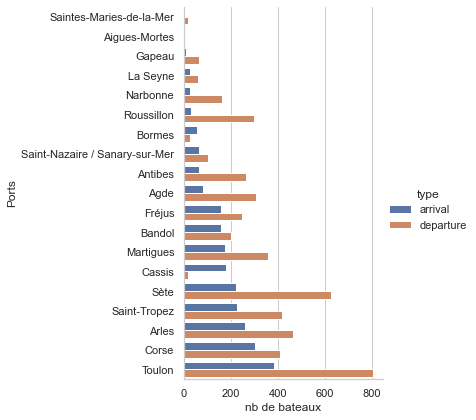

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=viz_df, kind="bar",
    x="value", y="port", hue="type", orient="h",
    height=6
)
g.set_axis_labels("nb de bateaux", "Ports")

plt.savefig("offset_ratio.png")
plt.show()

In [22]:
viz_df[viz_df.port == "Bormes"]

,port,value,type
27,Bormes,55,arrival
26,Bormes,28,departure


In [23]:
viz_df_arrival = viz_df[viz_df.type == "arrival"]
viz_df_departure = viz_df[viz_df.type == "departure"]
viz_df_ratios = viz_df_departure.merge(viz_df_arrival, on="port")
viz_df_ratios["ratio"] = ((viz_df_ratios.value_y.astype(int) / viz_df_ratios.value_x.astype(int)) * 100).round().astype(int)
viz_df_ratios.sort_values(by=['ratio'], inplace=True)

viz_df_ratios

,port,value_x,type_x,value_y,type_y,ratio
2,Saintes-Maries-de-la-Mer,20,departure,1,arrival,5
11,Roussillon,300,departure,31,arrival,10
7,Narbonne,164,departure,27,arrival,16
5,Gapeau,66,departure,11,arrival,17
10,Antibes,266,departure,65,arrival,24
12,Agde,306,departure,84,arrival,27
17,Sète,625,departure,223,arrival,36
4,La Seyne,60,departure,25,arrival,42
18,Toulon,806,departure,384,arrival,48
13,Martigues,358,departure,176,arrival,49


In [24]:
# Suppression des villes avec des ratios absurdes 
# 10 bateaux partent et 100 bateaux arrivent à Marseille

viz_df_ratios_noabsurdity = viz_df_ratios[viz_df_ratios.ratio <= 100]

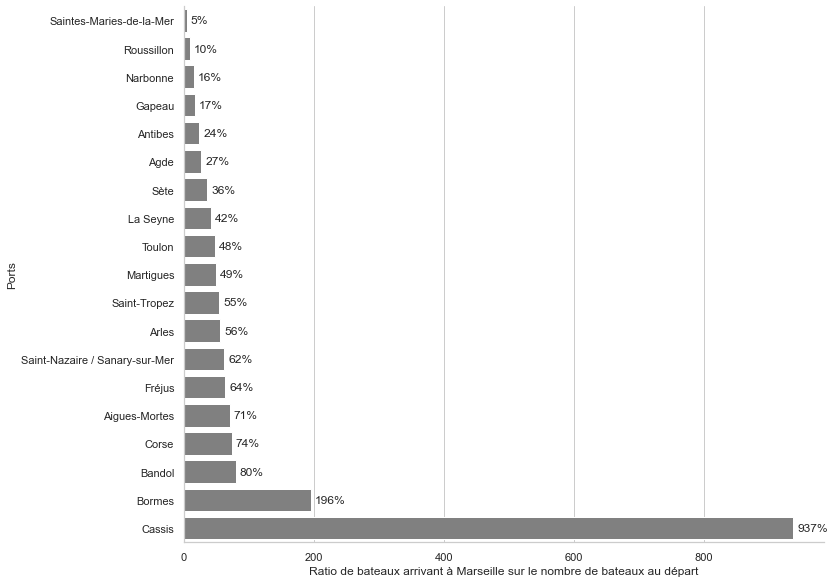

In [25]:
g = sns.catplot(
    data=viz_df_ratios,
    x="ratio", y="port", orient="h", color="grey",
    kind="bar",
    height=8.27, aspect=11.7/8.27,
    
)

ax = g.facet_axis(0, 0)

# iterate through the axes containers
for c in ax.containers:
    ax.bar_label(c, fmt='%.0f%%', padding=4)

g.set_axis_labels("Ratio de bateaux arrivant à Marseille sur le nombre de bateaux au départ", "Ports")

plt.savefig("ratios.png")
plt.show()

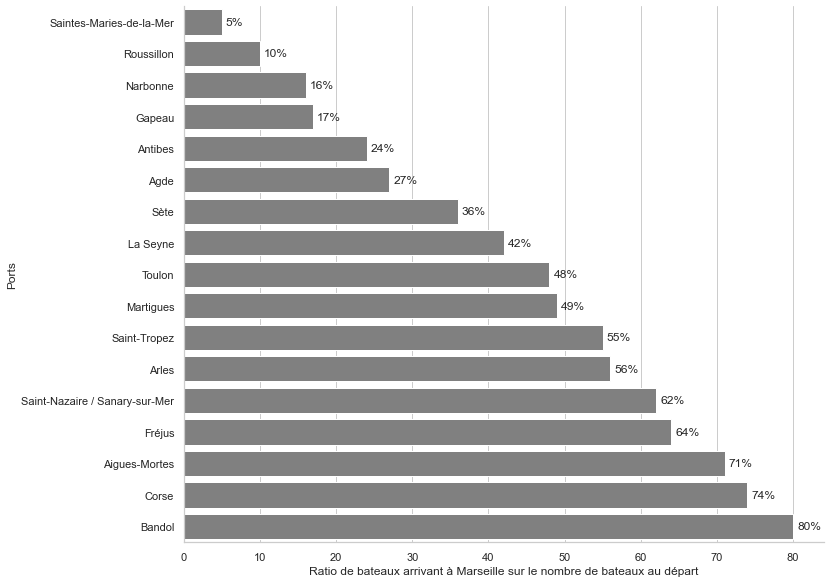

In [26]:
g = sns.catplot(
    data=viz_df_ratios_noabsurdity,
    x="ratio", y="port", orient="h", color="grey",
    kind="bar",
    height=8.27, aspect=11.7/8.27,
    
)

ax = g.facet_axis(0, 0)

# iterate through the axes containers
for c in ax.containers:
    ax.bar_label(c, fmt='%.0f%%', padding=4)

g.set_axis_labels("Ratio de bateaux arrivant à Marseille sur le nombre de bateaux au départ", "Ports")

plt.savefig("ratios_noabsurdity.png")
plt.show()